# Laboratorio 1 - Modelación y Simulación
Stefano Aragoni, Luis Santos


----------------

### Importar librerías


In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import skew, kurtosis
from scipy.stats import uniform, chisquare
from scipy.special import erfinv
import scipy.interpolate as interpolate
from scipy import stats
from scipy.stats import norm

--------
### Ejercicio 1
Genere una muestra aleatoria de 1000 puntos de datos de una distribución normal con media 0 y desviación estándar 1.

Tasks:
1. Calcule e imprima la media, la varianza y la asimetría de la muestra.
2. Trace un histograma de los datos y observe su forma.
3. ¿Qué le dicen estas estadísticas sobre la tendencia central, la dispersión y la forma de los datos?

Mediana:  0.06921425621119745
Varianza:  1.0331151571498944
Asimetría:  -0.024959941850623366


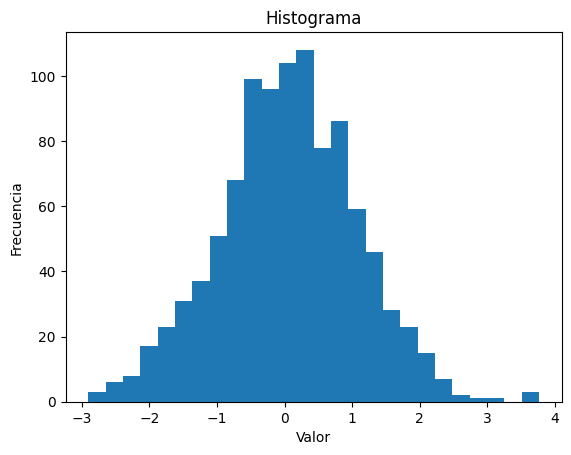

In [46]:
x = np.random.normal(0, 1, 1000)

median = np.median(x)
variance = np.var(x)
asymetry = np.mean((x - median)**3) / variance**(3/2)

# 1.1
print("Mediana: ", median)
print("Varianza: ", variance)
print("Asimetría: ", asymetry)

# 1.2
plt.hist(x, bins='auto')
plt.title("Histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


--------
### Ejercicio 2
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución exponencial con parámetro de tasa 0.5.

# *preguntar a alberto si tasa == scale* -> scale = 1/tasa?

Tasks:
1. Trace la función de densidad de probabilidad (PDF) y la función de distribución acumulativa (CDF) de los datos.
2. Calcule e imprima las probabilidades para intervalos específicos utilizando la CDF. (por lo menos 2 intervalos a su elección)
3. ¿Qué información puede obtener de la forma del PDF y el comportamiento de la CDF?

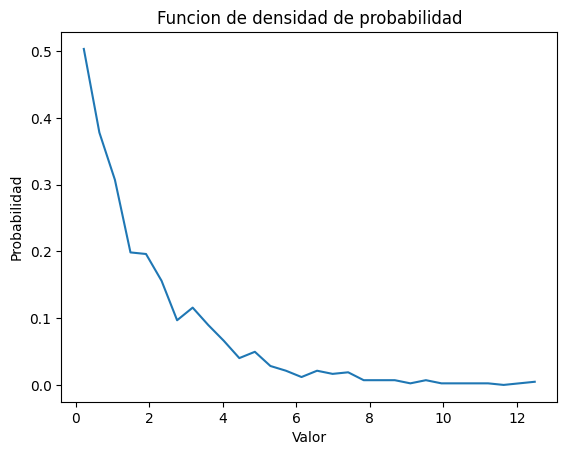

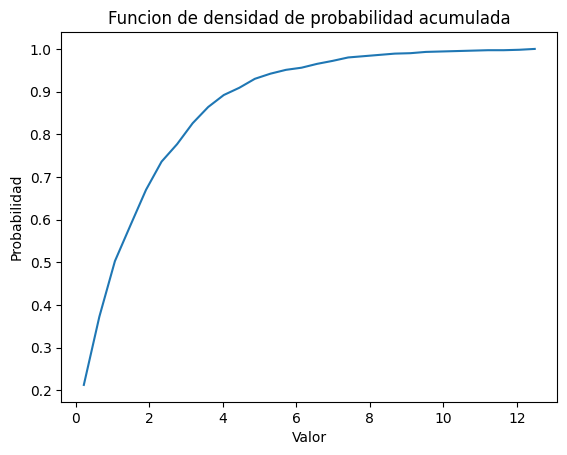

Probabilidad (CDF) para el intervalo [1, 2]: 0.2386512185411911
Probabilidad (CDF) para el intervalo [0, 2]: 0.6321205588285577


In [59]:
x = np.random.exponential(1/0.5, 1000)

#2.1
pdf, bins = np.histogram(x, bins='auto', density=True) # PDF -> Probability Density Function
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, pdf)
plt.title("Funcion de densidad de probabilidad")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()

cdf = np.cumsum(pdf) * np.diff(bins)[0] # CDF -> Cumulative Density Function
plt.plot(bin_centers, cdf)
plt.title("Funcion de densidad de probabilidad acumulada")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()

#2.2
intervalo_1_prob = expon.cdf(2, scale=1/0.5) - expon.cdf(1, scale=1/0.5)
intervalo_2_prob = expon.cdf(2, scale=1/0.5) - expon.cdf(0, scale=1/0.5)

print("Probabilidad (CDF) para el intervalo [1, 2]:", intervalo_1_prob)
print("Probabilidad (CDF) para el intervalo [0, 2]:", intervalo_2_prob)

----------
### Ejercicio 3
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución beta con parámetros de forma (2, 2).

Tasks:
1. Calcule e imprima el sesgo y la curtosis de la muestra.
2. Analice las implicaciones del sesgo y la curtosis en la forma y las características de la distribución.

In [48]:
x = np.random.beta(2, 2, 1000)

#3.1
sesgo = np.mean((x - np.mean(x))**3) / np.var(x)**(3/2)
curtosis = np.mean((x - np.mean(x))**4) / np.var(x)**2 - 3

print("Sesgo (Manual): ", sesgo)
print("Sesgo (Scipy): ", skew(x))

print("\nCurtosis (Manual): ", curtosis)
print("Curtosis (Scipy): ", kurtosis(x))

Sesgo (Manual):  0.00915866293103769
Sesgo (Scipy):  0.009158662931037715

Curtosis (Manual):  -0.903345097772462
Curtosis (Scipy):  -0.903345097772462


--------
### Ejercicio 4
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución de Poisson con parámetro lambda 5.

Tasks:
1. Trace un histograma de los datos generados.
2. Calcule e imprima la media y la varianza de la muestra.
3. ¿Puedes observar algún patrón o tendencia en los datos generados a partir de la distribución de Poisson?

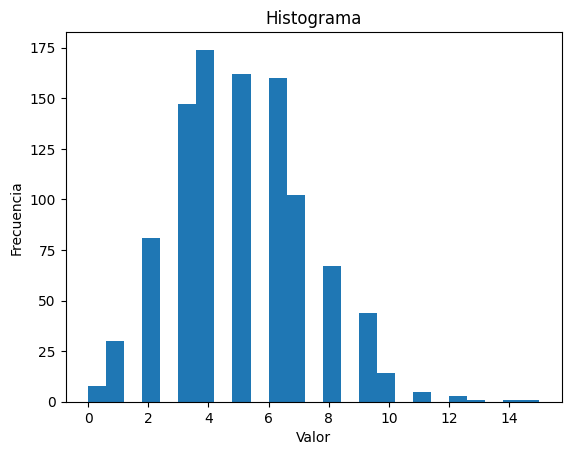

Media:  5.018
Varianza:  4.967676


In [49]:
x = np.random.poisson(5, 1000)

#4.1
plt.hist(x, bins='auto')
plt.title("Histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

#4.2
mean = np.mean(x)
variance = np.var(x)

print("Media: ", mean)
print("Varianza: ", variance)

---------
### Ejercicio 5
Muestree 500 puntos de datos de una distribución normal utilizando el método de transformación inversa.

Tasks:
1. Trace un histograma de los datos generados.
2. Compare el histograma con la PDF teórica de la distribución normal.
3. ¿La muestra generada representa con precisión la distribución normal subyacente?


Referencias:
- How to do inverse transformation sampling in scipy and numpy:
https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/ 
- Codigo de Alberto: https://colab.research.google.com/drive/1YCtrIrKIU0IN8Krp61qLNxUq_xukQ485?usp=sharing


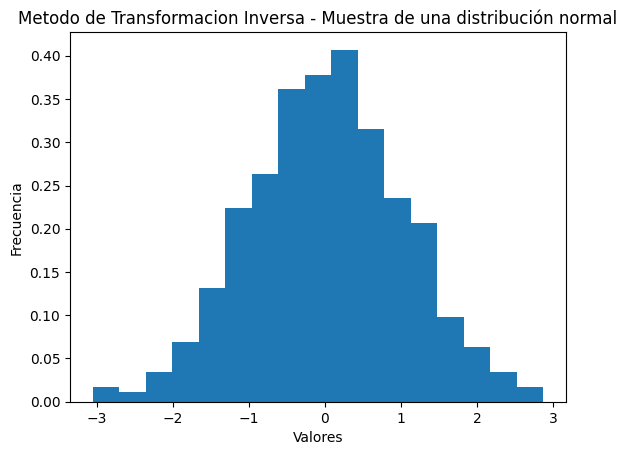

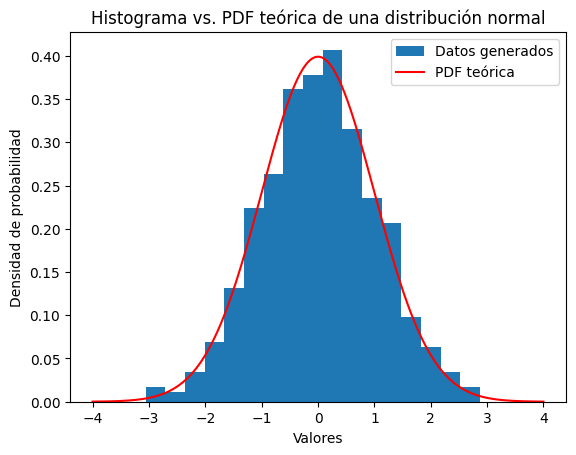

In [167]:
u = np.random.uniform(0, 1, 500)

# aplicar metodo de transformación inversa para obtener una muestra de una distribución normal
x = 0 + 1 * np.sqrt(2) * erfinv(2 * u - 1) 

#5.1
plt.hist(x, bins='auto', density=True)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Metodo de Transformacion Inversa - Muestra de una distribución normal')
plt.show()

#5.2
plt.hist(x, bins='auto', density=True, label='Datos generados')

pdf_teorico = norm.pdf(np.linspace(-4, 4, 500) , loc=0, scale=1)  # PDF teórica de una distribución normal
plt.plot(np.linspace(-4, 4, 500), pdf_teorico, 'r', label='PDF teórica')

plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma vs. PDF teórica de una distribución normal')
plt.legend()
plt.show()



# Consultar si está bien la superposición de gráficos para comparar histograma con pdf de distribucion normal

---------
### Ejercicio 6
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución gamma con parámetro de forma 2 y parámetro de escala 3.

Tasks:
1. Utilice MLE para estimar los parámetros de forma y escala de la distribución gamma de la muestra.
2. ¿Qué tan cerca están los parámetros estimados de los parámetros verdaderos?
3. ¿Puede evaluar la bondad de ajuste de la distribución estimada a los datos observados?

In [120]:
x = np.random.gamma(2, 3, 1000)

#6.1
estimated_shape, _, estimated_scale = stats.gamma.fit(x, floc=0)  # stats.gamma.fit -> Maximum Likelihood Estimation
print("Forma estimada:", estimated_shape)
print("Escala estimada:", estimated_scale)

error_shape = abs((2 - estimated_shape) / 2) * 100
error_scale = abs((3 - estimated_scale) / 3) * 100
print("\nError de forma:", error_shape, "%")
print("Error de escala:", error_scale, "%")

Forma estimada: 1.9863084131961746
Escala estimada: 2.967445900478436

Error de forma: 0.6845793401912714 %
Error de escala: 1.0851366507188023 %


---------
### Ejercicio 7
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución normal bivariada con vector medio [0, 0] y matriz de covarianza [[1, 0,5], [0,5, 1]].

Tasks:
1. Visualice los puntos de datos en un diagrama de dispersión.
2. Calcula e imprime el coeficiente de correlación entre las dos variables.
3. ¿Qué información puede obtener sobre la relación entre las variables del diagrama de dispersión y el
coeficiente de correlación?

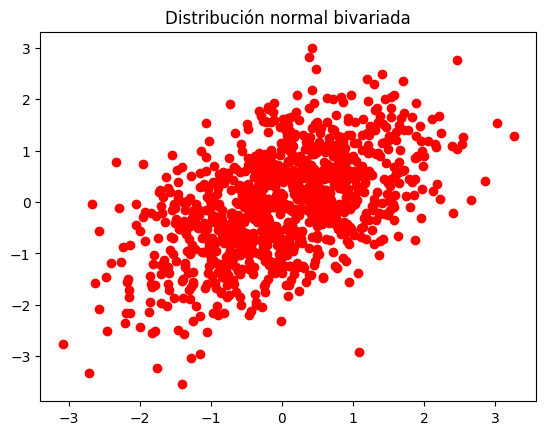

Coeficiente de correlación: 0.513640665340995


In [105]:
vector_medio = [0, 0]
matriz_cov = [[1, 0.5], [0.5, 1]]

dist_biv = np.random.multivariate_normal(vector_medio, matriz_cov, 1000).T

#7.1
plt.scatter(dist_biv[0], dist_biv[1], c='r', marker='o')
plt.title('Distribución normal bivariada')
plt.show()

#7.2
correlation_coefficient = np.corrcoef(dist_biv[0], dist_biv[1])[0, 1]
print("Coeficiente de correlación:", correlation_coefficient)


---------
### Ejercicio 8
Investigue en qué consiste la prueba “Goodness-of-Fit”. Luego, genere una muestra aleatoria de 500 puntos de datos a partir de una distribución uniforme entre 0 y 1.

Tasks:
1. Realice una prueba de bondad de ajuste de chi-cuadrado para evaluar si la muestra sigue una distribución uniforme.
2. Interprete el resultado de la prueba y saque conclusiones sobre el ajuste de los datos.
3. ¿Puede sugerir alguna modificación para mejorar la bondad de ajuste?


Referencia: How to Perform a Chi-Square Goodness of Fit Test in Python - https://www.geeksforgeeks.org/how-to-perform-a-chi-square-goodness-of-fit-test-in-python/

In [161]:
muestra = np.random.uniform(0, 1, 500)  # muestra de una distribución uniforme [0, 1]
teorico = uniform(loc=0, scale=1)       # distribución teórica

muestra_hist, _ = np.histogram(muestra, bins='auto')
print("Frecuencias observadas:", muestra_hist)

teorico_hist = teorico.pdf(np.linspace(0, 1, 10)) * 50
print("Frecuencias esperadas:", teorico_hist)

#8.1
chi, p = chisquare(muestra_hist, teorico_hist)
print("\nChi Cuadrado:", chi)
print("P-valor:", p)

Frecuencias observadas: [54 47 59 48 57 49 54 41 50 41]
Frecuencias esperadas: [50. 50. 50. 50. 50. 50. 50. 50. 50. 50.]

Chi Cuadrado: 6.760000000000001
P-valor: 0.662090729039073
